In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [46]:
pd.options.display.max_columns=None

In [47]:
df = pd.read_csv("../archivos_editados/df_completo.csv",index_col=0)
df.shape

(25973, 22)

In [48]:
df.duplicated().sum()

10

In [49]:
df.drop_duplicates(inplace= True)

In [50]:
dic_columnas={'Q3':"pais", 
              'Q4':"nivel_estudios", 
              'Q5':"tipo_trabajo",
              'Q6':"tiempo_cod", 
              'Q8':"len_recom",
              'Q15':"tiempo_use_ML",
              'Q20':"sector_empresa", 
              'Q21':"tamaño_empresa", 
              'Q23':"uso_ML", 
              'Q25':"salario", 
              'Q33':"BBDD",
              'Q35':"herramientas_BI2", 
              'Q41':"herramienta_principal", 
              'Q7':"lenguaje_cod", 
              'Q9':"entorno_ID", 
              'Q14':"librerias", 
              'Q16':"librerias_ML", 
              'Q17':"algoritmos_ML", 
              'Q24':"actividades_trabajo", 
              'Q34':"herramientas_BI",
              'age':"edad", 
              'gender':"genero"}

In [51]:
df.rename(columns=dic_columnas, inplace=True)


In [52]:
df = df.reset_index(drop = True)


In [53]:
nuevo_orden=['edad','genero', 'pais', 'nivel_estudios', 'tipo_trabajo', 'tiempo_cod', 'len_recom',
       'tiempo_use_ML', 'sector_empresa', 'tamaño_empresa', 'uso_ML',
       'salario', 'BBDD', 'herramientas_BI', 'herramienta_principal',
       'lenguaje_cod', 'entorno_ID', 'librerias', 'librerias_ML',
       'algoritmos_ML', 'actividades_trabajo', 'herramientas_BI2']

In [54]:
df = df.reindex(columns = nuevo_orden)


CREAMOS UN FATAFRAME NUEVO QUEDÁNDONOS SOLO CON LOS DATA Y BUSINESS ANALYST

In [55]:
df_data = df[(df["tipo_trabajo"] == "Business Analyst") | (df ["tipo_trabajo"] == "Data Analyst")]
df_data.head(5)

,edad,genero,pais,nivel_estudios,tipo_trabajo,tiempo_cod,len_recom,tiempo_use_ML,sector_empresa,tamaño_empresa,uso_ML,salario,BBDD,herramientas_BI,herramienta_principal,lenguaje_cod,entorno_ID,librerias,librerias_ML,algoritmos_ML,actividades_trabajo,herramientas_BI2
16,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,Python,1-2 years,Energy/Mining,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"2,000-2,999",NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Scikit-learn,Linear or Logistic Regression,Analyze and understand data to influence produ...,NaN
32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,R,I do not use machine learning methods,Manufacturing/Fabrication,250-999 employees,NaN,NaN,NaN,NaN,NaN,R,RStudio,Ggplot / ggplot2,NaN,NaN,NaN,NaN
33,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,R,I do not use machine learning methods,Non-profit/Service,0-49 employees,No (we do not use ML methods),"7,500-9,999",NaN,None,"Basic statistical software (Microsoft Excel, G...",Python,"Notepad++,Jupyter Notebook",None,NaN,NaN,Analyze and understand data to influence produ...,NaN
46,22-24,Man,China,Some college/university study without earning ...,Data Analyst,< 1 years,Python,1-2 years,Computers/Technology,0-49 employees,No (we do not use ML methods),$0-999,NaN,NaN,"Basic statistical software (Microsoft Excel, G...","Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Plotly / Plotly Express","Scikit-learn , TensorFlow ,Keras ,PyTorch","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN
52,40-44,Man,South Africa,Master’s degree,Data Analyst,1-3 years,R,1-2 years,Manufacturing/Fabrication,250-999 employees,No (we do not use ML methods),"25,000-29,999",NaN,Microsoft Power BI,"Local development environments (RStudio, Jupyt...","R, SQL","RStudio ,Jupyter Notebook","Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny","Caret ,Tidymodels","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN


VAMOS A FILTRAR POR LA COLUMNA "lenguaje_cod" PARA VER LOS LENGUAJES MÁS UTILIZADOS

QUE LENGUAJES SE UTILIZAN MÁS

In [56]:
lista_lenguajes = ["Python", "R", "SQL", "C[^\+]", "C\+\+" ,"Java", "Javascript", "Julia", "Swift", "Bash", "MATLAB", "Other", "None" ]


In [57]:
lista_lenguajes

['Python',
 'R',
 'SQL',
 'C[^\\+]',
 'C\\+\\+',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'Other',
 'None']

In [58]:
#CREAMOS UNA FUNCION PARA ITERAR POR TODA LA COLUMNA

def lenguajes (columna,lista):
    valores = []
    for elemento in lista:
        valor = columna.str.contains(elemento, case = True, regex = True).sum() 
        valores.append(valor)
    return valores

In [59]:
lista_valores = lenguajes(df_data["lenguaje_cod"], lista_lenguajes)

In [60]:
lista_valores

[2465, 928, 1866, 192, 288, 505, 327, 21, 20, 131, 230, 300, 59]

In [61]:
lista_data = lista_lenguajes , lista_valores

In [62]:
lista_data

(['Python',
  'R',
  'SQL',
  'C[^\\+]',
  'C\\+\\+',
  'Java',
  'Javascript',
  'Julia',
  'Swift',
  'Bash',
  'MATLAB',
  'Other',
  'None'],
 [2465, 928, 1866, 192, 288, 505, 327, 21, 20, 131, 230, 300, 59])

In [63]:
df_lenguajes = pd.DataFrame(lista_data).T

In [64]:
nombre_columnas = {0: "lenguajes", 1: "Cantidad_de_usuarios"} ## cambiamos el nombre a las columnas

In [65]:
df_lenguajes.rename(columns = nombre_columnas, inplace = True)

In [114]:
df_lenguajes = df_lenguajes.sort_values(by = "Cantidad_de_usuarios", ascending = False)
df_lenguajes["porcentaje"] = (df_lenguajes['Cantidad_de_usuarios'] / df_lenguajes['Cantidad_de_usuarios'].sum()) * 100
df_lenguajes["porcentaje"] = df_lenguajes["porcentaje"].astype(float)
df_lenguajes["porcentaje"] = df_lenguajes["porcentaje"].apply(round)
df_lenguajes

,lenguajes,Cantidad_de_usuarios,porcentaje
0,Python,2465,34
2,SQL,1866,25
1,R,928,13
5,Java,505,7
6,Javascript,327,4
11,Other,300,4
4,C\+\+,288,4
10,MATLAB,230,3
3,C[^\+],192,3
9,Bash,131,2


    Los lenguajes más utilizados claramente son Python y SQL, que son los mismos que utiliza Adalab. Creamos una gráfica para su mejor visualización.

<AxesSubplot:xlabel='porcentaje', ylabel='lenguajes'>

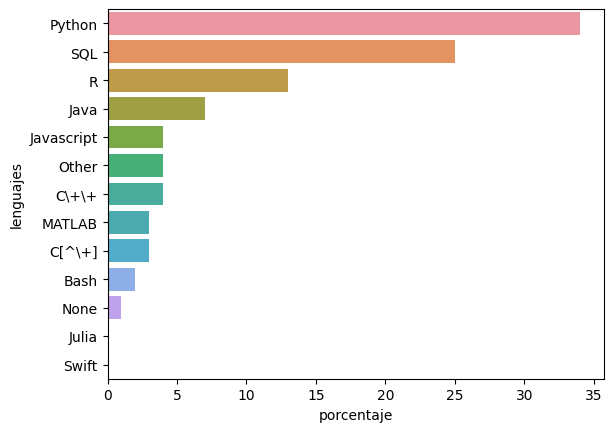

In [113]:
sns.barplot(data = df_lenguajes, x='porcentaje', y = "lenguajes"  )

VAMOS A FILTRAR POR LA COLUMNA "len_recom" PARA VER LOS LENGUAJES MÁS RECOMENDADOS

QUE LENGUAJES RECOMIENDAN

In [68]:
lista_lenguajes

['Python',
 'R',
 'SQL',
 'C[^\\+]',
 'C\\+\\+',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'Other',
 'None']

In [69]:
df_data["len_recom"].unique()

array(['Python', 'R', 'C', 'SQL', nan, 'Java', 'C++', 'MATLAB', 'Other',
       'Julia', 'Javascript', 'Bash', 'None', 'Swift'], dtype=object)

In [117]:
df_lenguaje_recomendado = df_data["len_recom"].value_counts().reset_index()
df_lenguaje_recomendado["porcentaje"] = (df_lenguaje_recomendado['len_recom'] / df_lenguaje_recomendado['len_recom'].sum()) * 100
df_lenguaje_recomendado["porcentaje"] = df_lenguaje_recomendado["porcentaje"].astype(float)
df_lenguaje_recomendado["porcentaje"] = df_lenguaje_recomendado["porcentaje"].apply(round)
df_lenguaje_recomendado

,index,len_recom,porcentaje
0,Python,2195,73
1,SQL,349,12
2,R,263,9
3,C++,39,1
4,Java,30,1
5,C,25,1
6,Other,24,1
7,MATLAB,20,1
8,Julia,14,0
9,None,14,0


<AxesSubplot:xlabel='index', ylabel='porcentaje'>

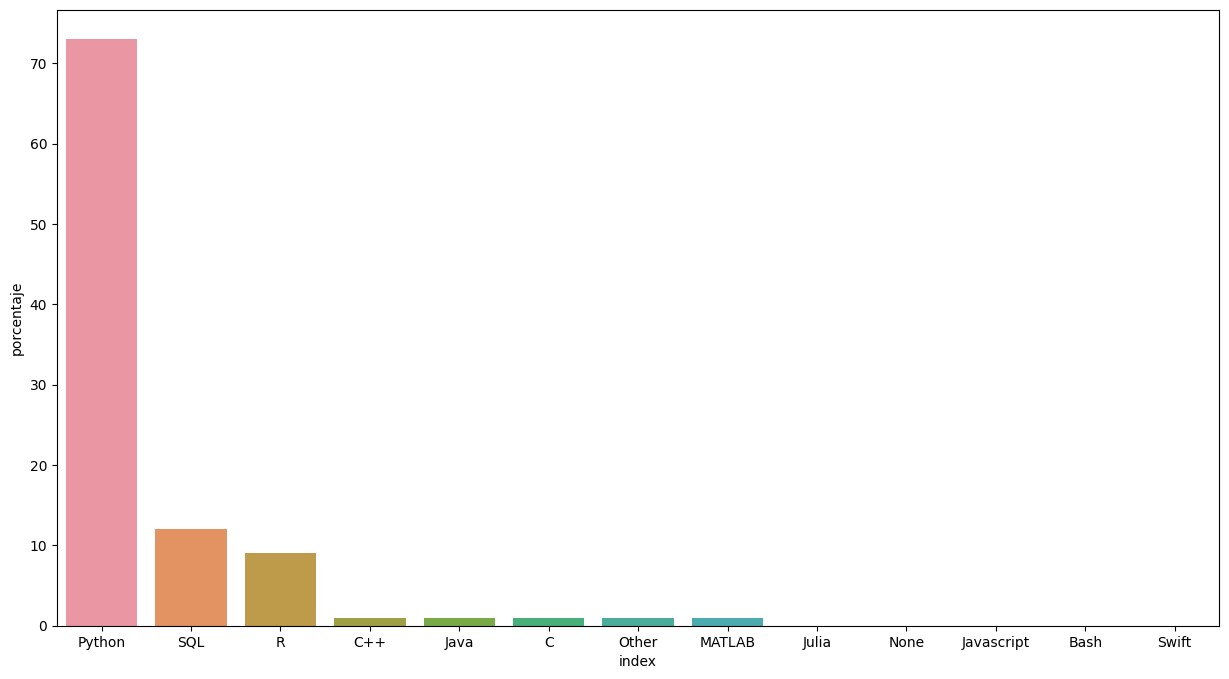

In [118]:
plt.figure(figsize = (15,8))
sns.barplot(x= "index",y = "porcentaje", data = df_lenguaje_recomendado)

La mayoría de analistas recomiendan empezar estudiando python y, en menor medida, SQL y R.

Vemos que la mayoría de analistas tienen menos de 5 años de experiencia.

VAMOS A FILTRAR POR LA COLUMNA "entorno_ID" PARA VER LOS ENTORNOS MÁS UTILIZADOS

In [72]:
lista_entornos = ["JupyterLab", "RStudio", "Visual Studio", "Visual Studio Code \(VSCode\)", "PyCharm", "Spyder", "Notepad\+\+", "Sublime Text",
                  "Vim", "Emacs", "MATLAB", "Jupyter Notebook", "None","Other"]

In [73]:
def entornos(columna,lista):
    valores = []
    for elemento in lista:
        valor = columna.str.contains(elemento, regex = True).sum() 
        valores.append(valor)
    return valores

In [74]:
valores_entornos = entornos(df_data["entorno_ID"], lista_entornos)

In [75]:
lista_entornos_usados = lista_entornos , valores_entornos

In [76]:
df_entornos = pd.DataFrame(lista_entornos_usados).T
df_entornos

,0,1
0,JupyterLab,634
1,RStudio,820
2,Visual Studio,1144
3,Visual Studio Code \(VSCode\),865
4,PyCharm,728
5,Spyder,476
6,Notepad\+\+,539
7,Sublime Text,259
8,Vim,86
9,Emacs,86


In [77]:
nombre_columnas = {0: "Entornos", 1: "Cantidad_de_usuarios"}

In [78]:
df_entornos.rename(columns = nombre_columnas, inplace = True)

In [119]:
df_entornos = df_entornos.sort_values(by = "Cantidad_de_usuarios", ascending = False)
df_entornos["porcentaje"] = (df_entornos['Cantidad_de_usuarios'] / df_entornos['Cantidad_de_usuarios'].sum()) * 100
df_entornos["porcentaje"] = df_entornos["porcentaje"].astype(float)
df_entornos["porcentaje"] = df_entornos["porcentaje"].apply(round)
df_entornos

,Entornos,Cantidad_de_usuarios,porcentaje
11,Jupyter Notebook,2149,26
2,Visual Studio,1144,14
3,Visual Studio Code \(VSCode\),865,11
1,RStudio,820,10
4,PyCharm,728,9
0,JupyterLab,634,8
6,Notepad\+\+,539,7
5,Spyder,476,6
7,Sublime Text,259,3
10,MATLAB,166,2


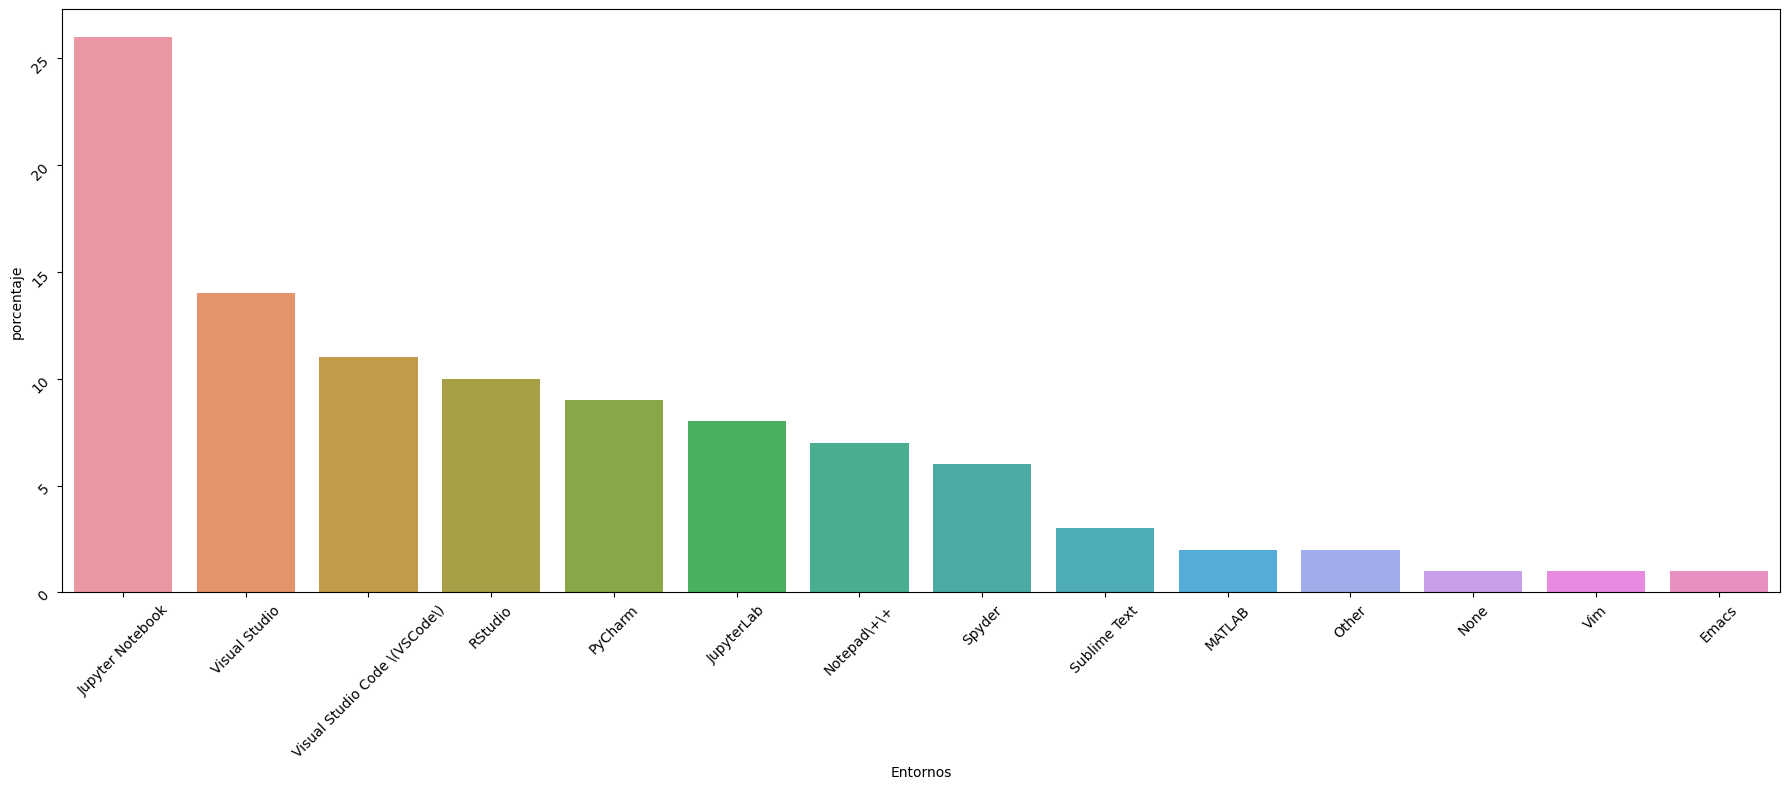

In [120]:
plt.figure(figsize = (18,8))
sns.barplot(x= "Entornos", y = "porcentaje", data = df_entornos)
plt.tick_params(rotation = 45)
plt.tight_layout()

VAMOS A FILTRAR POR LA COLUMNA "librerias" PARA VER LAS LIBRERIAS MÁS UTILIZADAS

In [82]:
def sel_valores (columna,lista):
    valores = []
    for elemento in lista:
        valor = columna.str.contains(elemento, case = True, regex = True).sum() 
        valores.append(valor)
    return valores

In [83]:
lista_librerias = ['Matplotlib', 'Seaborn', 'Plotly / Plotly Express', 'Ggplot / ggplot2', 'Shiny', 'D3 js', 'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'None', 'Other']

In [84]:
librerias = sel_valores(df_data["librerias"], lista_librerias)
librerias

[1984, 1559, 796, 830, 235, 105, 50, 138, 198, 94, 420, 127]

In [85]:
lista_total = lista_librerias, librerias
lista_total

(['Matplotlib',
  'Seaborn',
  'Plotly / Plotly Express',
  'Ggplot / ggplot2',
  'Shiny',
  'D3 js',
  'Altair',
  'Bokeh',
  'Geoplotlib',
  'Leaflet / Folium',
  'None',
  'Other'],
 [1984, 1559, 796, 830, 235, 105, 50, 138, 198, 94, 420, 127])

In [121]:
df_librerias = pd.DataFrame(lista_total).T
nombre_columnas = {0: "Librerias", 1: "Cantidad_de_usuarios"}
df_librerias.rename(columns = nombre_columnas, inplace = True)
df_librerias["porcentaje"] = (df_librerias['Cantidad_de_usuarios'] / df_librerias['Cantidad_de_usuarios'].sum()) * 100
df_librerias["porcentaje"] = df_librerias["porcentaje"].astype(float)
df_librerias["porcentaje"] = df_librerias["porcentaje"].apply(round)
df_librerias


,Librerias,Cantidad_de_usuarios,porcentaje
0,Matplotlib,1984,30
1,Seaborn,1559,24
2,Plotly / Plotly Express,796,12
3,Ggplot / ggplot2,830,13
4,Shiny,235,4
5,D3 js,105,2
6,Altair,50,1
7,Bokeh,138,2
8,Geoplotlib,198,3
9,Leaflet / Folium,94,1


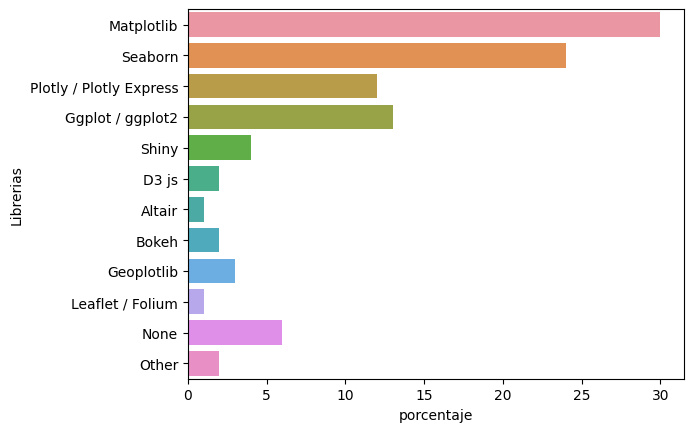

In [122]:
sns.barplot(data = df_librerias, x= 'porcentaje', y = 'Librerias');

In [88]:
df_data.to_csv("../archivos_editados/df_data.csv")